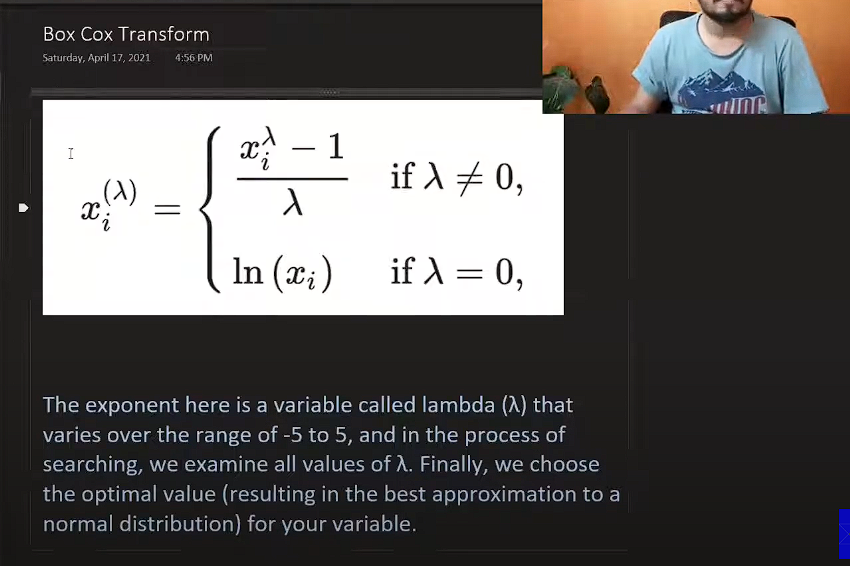

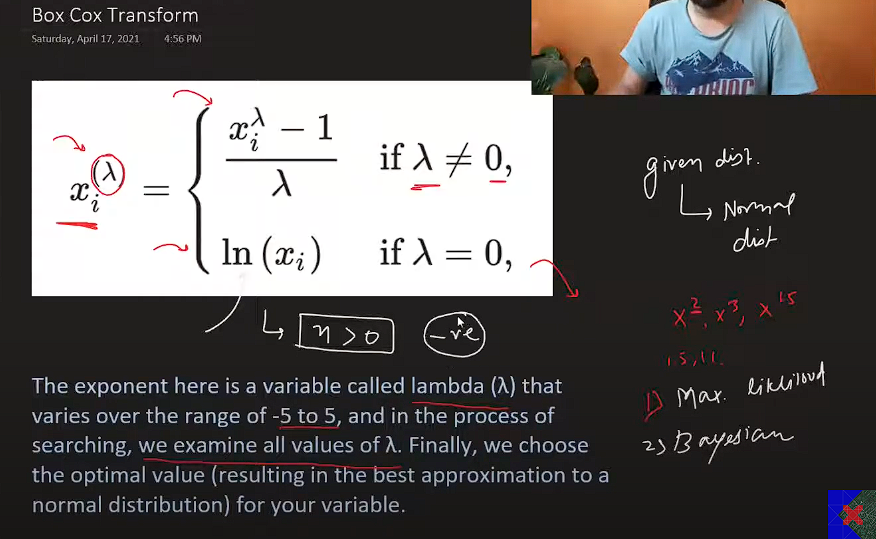

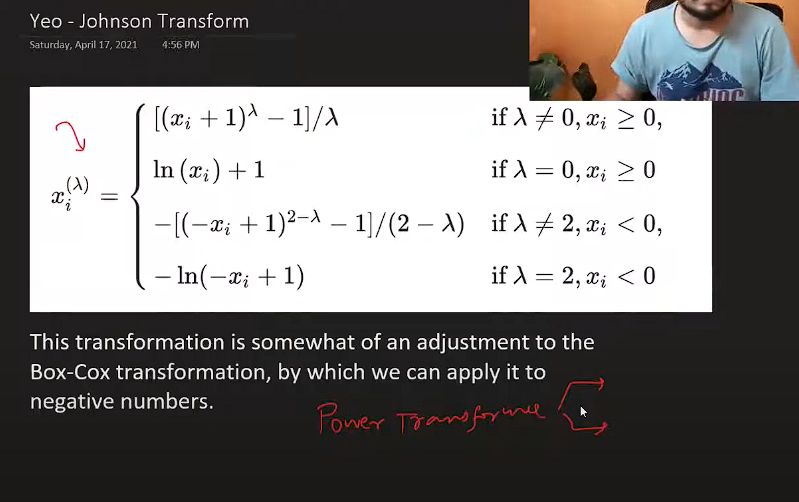

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [3]:
df_prev = pd.read_csv('concrete_data.csv')

In [4]:
df_prev.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df_prev.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
df = df_prev[df_prev.select_dtypes(include='number').columns] + 0.0001

In [7]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0001,0.0001,0.0001,162.0001,2.5001,1040.0001,676.0001,28.0001,79.9901
1,540.0001,0.0001,0.0001,162.0001,2.5001,1055.0001,676.0001,28.0001,61.8901
2,332.5001,142.5001,0.0001,228.0001,0.0001,932.0001,594.0001,270.0001,40.2701
3,332.5001,142.5001,0.0001,228.0001,0.0001,932.0001,594.0001,365.0001,41.0501
4,198.6001,132.4001,0.0001,192.0001,0.0001,978.4001,825.5001,360.0001,44.3001
...,...,...,...,...,...,...,...,...,...
1025,276.4001,116.0001,90.3001,179.6001,8.9001,870.1001,768.3001,28.0001,44.2801
1026,322.2001,0.0001,115.6001,196.0001,10.4001,817.9001,813.4001,28.0001,31.1801
1027,148.5001,139.4001,108.6001,192.7001,6.1001,892.4001,780.0001,28.0001,23.7001
1028,159.1001,186.7001,0.0001,175.6001,11.3001,989.6001,788.9001,28.0001,32.7701


In [8]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [9]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167964,73.895925,54.188450,181.567382,6.204760,972.919032,773.580585,45.662236,35.818061
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000100,0.000100,0.000100,121.800100,0.000100,801.000100,594.000100,1.000100,2.330100
25%,192.375100,0.000100,0.000100,164.900100,0.000100,932.000100,730.950100,7.000100,23.710100
50%,272.900100,22.000100,0.000100,185.000100,6.400100,968.000100,779.500100,28.000100,34.445100
75%,350.000100,142.950100,118.300100,192.000100,10.200100,1029.400100,824.000100,56.000100,46.135100
max,540.000100,359.400100,200.100100,247.000100,32.200100,1145.000100,992.600100,365.000100,82.600100


In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Strength']),df['Strength'],test_size=0.2,random_state=42)

In [11]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0001,0.0001,0.0001,162.0001,2.5001,1040.0001,676.0001,28.0001,79.9901
1,540.0001,0.0001,0.0001,162.0001,2.5001,1055.0001,676.0001,28.0001,61.8901
2,332.5001,142.5001,0.0001,228.0001,0.0001,932.0001,594.0001,270.0001,40.2701
3,332.5001,142.5001,0.0001,228.0001,0.0001,932.0001,594.0001,365.0001,41.0501
4,198.6001,132.4001,0.0001,192.0001,0.0001,978.4001,825.5001,360.0001,44.3001
...,...,...,...,...,...,...,...,...,...
1025,276.4001,116.0001,90.3001,179.6001,8.9001,870.1001,768.3001,28.0001,44.2801
1026,322.2001,0.0001,115.6001,196.0001,10.4001,817.9001,813.4001,28.0001,31.1801
1027,148.5001,139.4001,108.6001,192.7001,6.1001,892.4001,780.0001,28.0001,23.7001
1028,159.1001,186.7001,0.0001,175.6001,11.3001,989.6001,788.9001,28.0001,32.7701


In [12]:
X_train

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
995,158.6001,148.9001,116.0001,175.1001,15.0001,953.3001,719.7001,28.0001
507,424.0001,22.0001,132.0001,178.0001,8.5001,822.0001,750.0001,28.0001
334,275.1001,0.0001,121.4001,159.5001,9.9001,1053.6001,777.5001,3.0001
848,252.0001,97.0001,76.0001,194.0001,8.0001,835.0001,821.0001,28.0001
294,168.9001,42.2001,124.3001,158.3001,10.8001,1080.8001,796.2001,3.0001
...,...,...,...,...,...,...,...,...
87,286.3001,200.9001,0.0001,144.7001,11.2001,1004.6001,803.7001,3.0001
330,246.8001,0.0001,125.1001,143.3001,12.0001,1086.8001,800.9001,14.0001
466,190.3001,0.0001,125.2001,166.6001,9.9001,1079.0001,798.9001,100.0001
121,475.0001,118.8001,0.0001,181.1001,8.9001,852.1001,781.5001,28.0001


In [13]:
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.627553179231485

In [14]:
lr = LinearRegression()
np.mean(cross_val_score(lr,X_train,y_train,scoring='r2'))

0.5946055391992531

In [15]:
from scipy.stats import skew

C:\Users\shiva\AppData\Local\Temp\ipykernel_8180\3129462182.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


Cement -->has skewness--> 0.49244425957418086


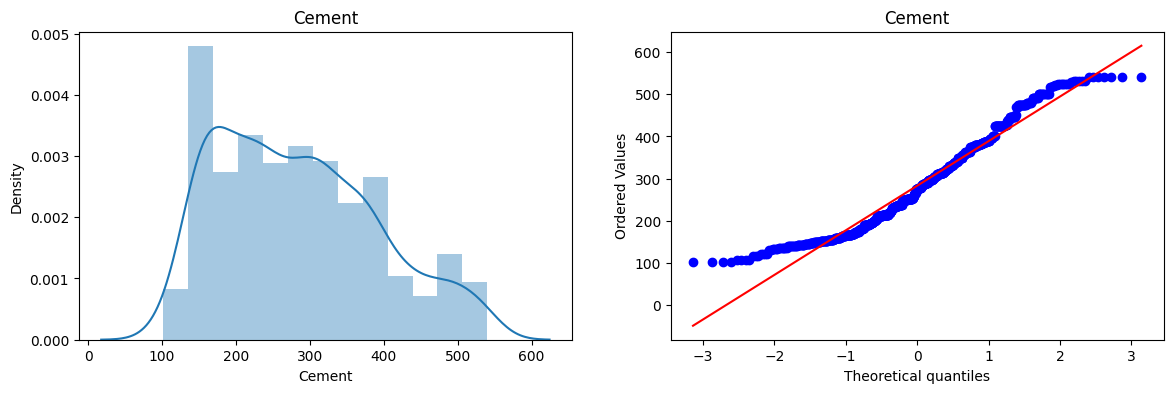

C:\Users\shiva\AppData\Local\Temp\ipykernel_8180\3129462182.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


Blast Furnace Slag -->has skewness--> 0.8006044706229952


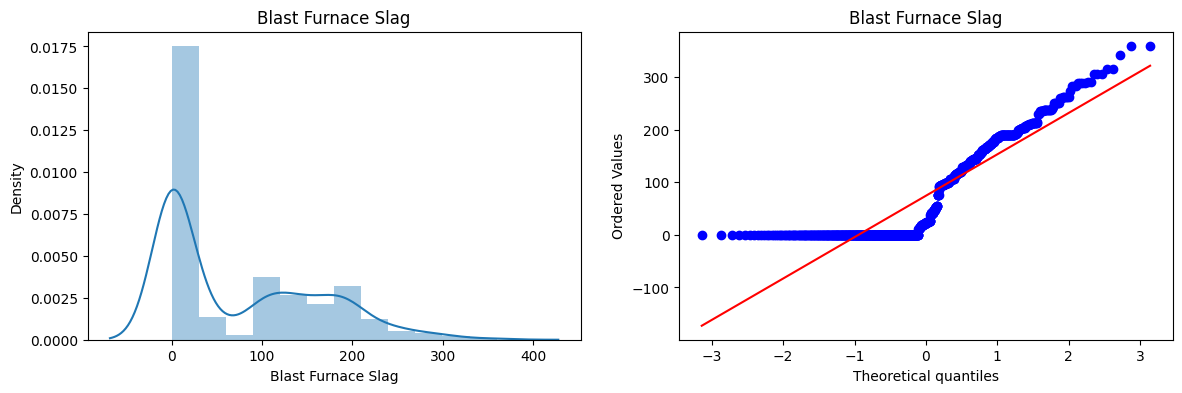

C:\Users\shiva\AppData\Local\Temp\ipykernel_8180\3129462182.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


Fly Ash -->has skewness--> 0.5650068384092114


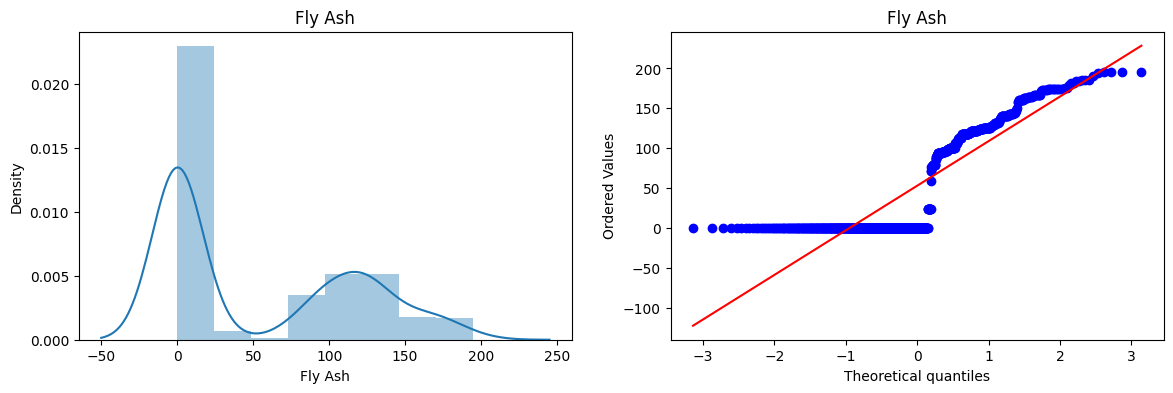

C:\Users\shiva\AppData\Local\Temp\ipykernel_8180\3129462182.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


Water -->has skewness--> 0.09180545497190656


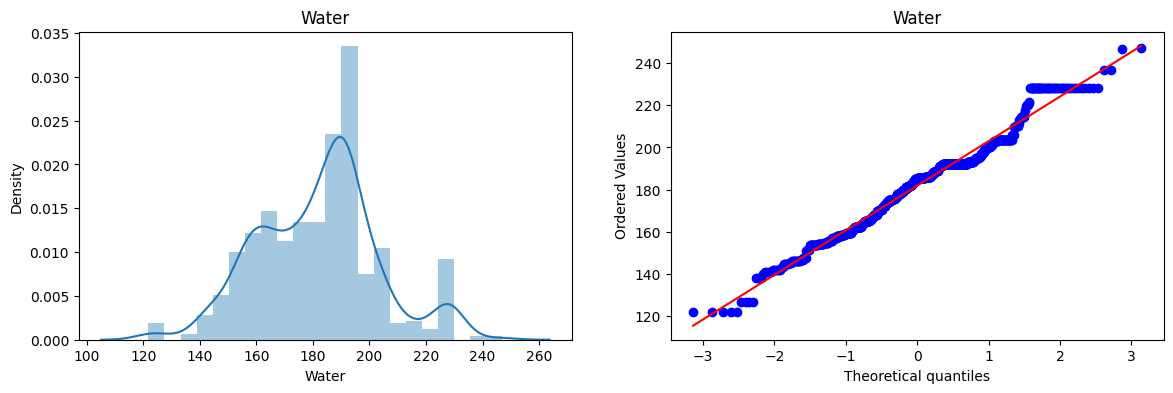

C:\Users\shiva\AppData\Local\Temp\ipykernel_8180\3129462182.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


Superplasticizer -->has skewness--> 0.8961146563432467


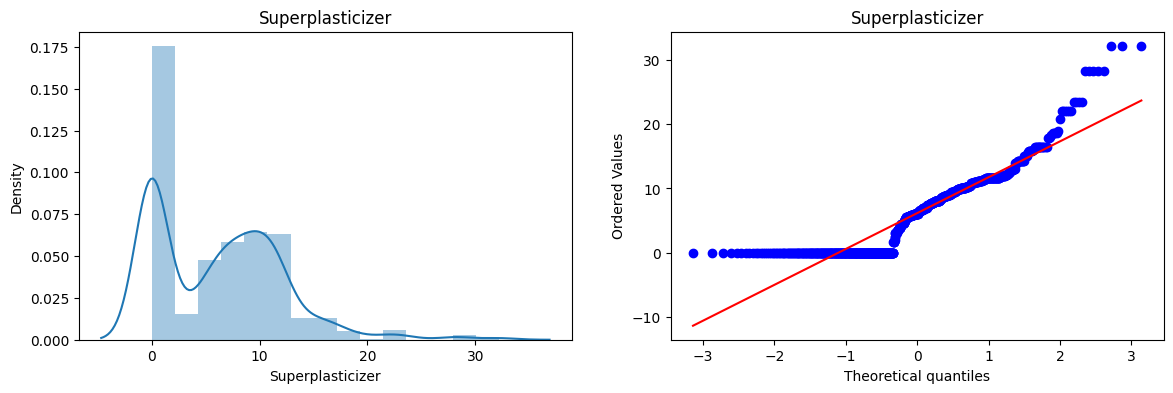

C:\Users\shiva\AppData\Local\Temp\ipykernel_8180\3129462182.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


Coarse Aggregate -->has skewness--> -0.04140936471837154


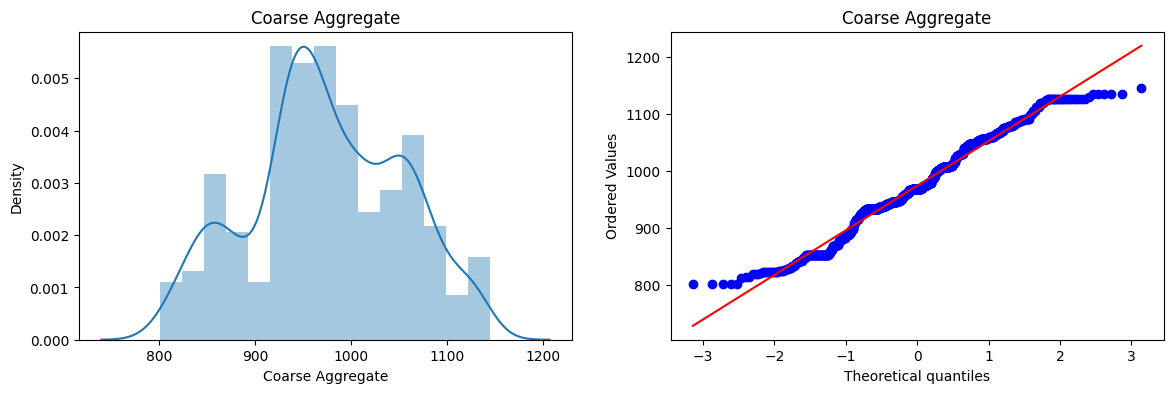

C:\Users\shiva\AppData\Local\Temp\ipykernel_8180\3129462182.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


Fine Aggregate -->has skewness--> -0.23955082187857252


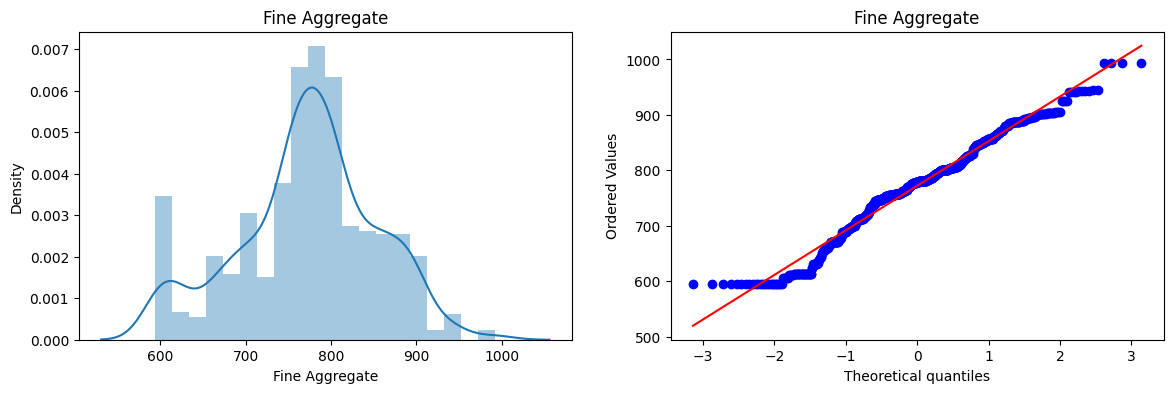

C:\Users\shiva\AppData\Local\Temp\ipykernel_8180\3129462182.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


Age -->has skewness--> 3.3293363935050504


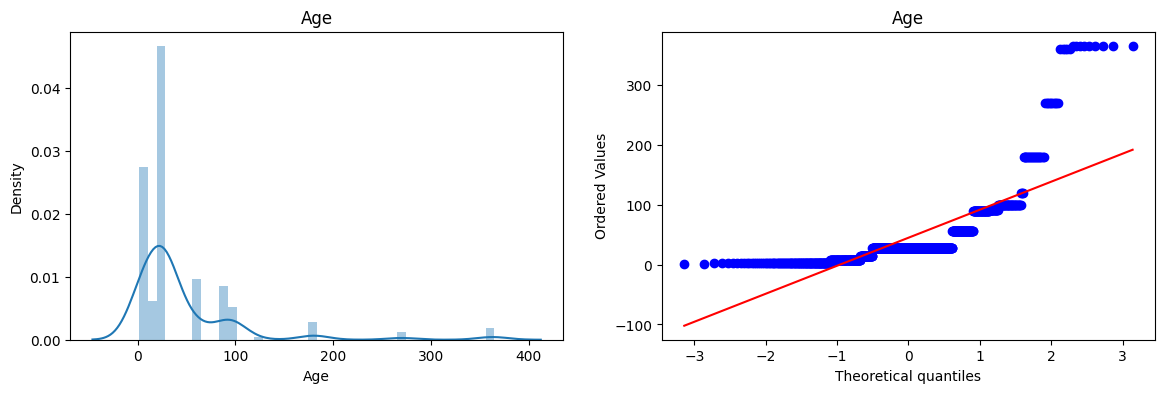

In [16]:
for col in X_train.columns:
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    # sns.histplot(X_train[col],kde=True,stat="density")
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)
    print(f'{col} -->has skewness--> {skew(X_train[col])}')
    plt.show()